# Esercizio 1/2 

Andiamo su http://www.datiopen.it/it/opendata/Mappa_dei_pub_circoli_locali_in_Italia e scarichiamo il file (in formato JSON) della mappa dei pub, circoli e locali in Italia

Nota: per leggerlo nella funzione open() dovremo aggiungere il parametro encoding="latin1", ad esempio: f = open(file_path, "r", encoding="latin1") dove file_path è chiaramente la posizione del file nel nostro calcolatore.

In [1]:
import pandas as pd
import os
percorso_attuale=os.getcwd()
path='/beginner_datasets/Mappa-dei-pub-circoli-locali-in-Italia.json'
df=pd.read_json(percorso_attuale+path,encoding="latin1")
df

,ccomune,cprovincia,cregione,cnome,canno_inserimento,cdata_e_ora_inserimento,cidentificatore_in_openstreetmap,clongitudine,clatitudine
0,ALTRO,ALTRO,ALTRO,,2011,2011-06-25T23:17:43Z,1339088150,13.733257,45.575830
1,ALTRO,ALTRO,ALTRO,Lenny's Pub,2011,2011-07-29T17:22:56Z,1375887295,12.418681,46.747584
2,ALTRO,ALTRO,ALTRO,Murrayfield Pub,2015,2015-10-24T09:28:06Z,3323888102,9.029585,45.831340
3,ALTRO,ALTRO,ALTRO,Snop?e,2010,2010-09-22T08:32:52Z,921157802,13.640939,45.954607
4,Ala di Stura,TORINO,Piemonte,,2012,2012-05-21T14:28:45Z,1760949034,7.307306,45.313150
...,...,...,...,...,...,...,...,...,...
2492,Barletta (BT),BARLETTA ANDRIA TRANI,Puglia,Santa Croce,2010,2010-01-17T16:15:08Z,615632993,16.285782,41.320671
2493,Bisceglie (BT),BARLETTA ANDRIA TRANI,Puglia,Auld Dublin,2014,2014-03-03T20:56:16Z,2613737619,16.497204,41.241814
2494,Bisceglie (BT),BARLETTA ANDRIA TRANI,Puglia,Ferus,2014,2014-01-07T19:22:18Z,2613737620,16.506175,41.240957
2495,Trani (BT),BARLETTA ANDRIA TRANI,Puglia,Re Artù,2009,2009-09-04T07:57:05Z,482836935,16.418124,41.281518


# Esercizio 2/2 

Esaminiamo il dataset: 
* quanti dati ci sono in totale?
* quali sono i metadati?
* stampiamo il primo elemento 
* stampiamo l'ultimo elemento
* riusciamo a stampare un elemento a caso?
* quali sono gli anni di inserimento presenti?
* quante attività ci sono nel quadrato di longitudine 9-10 e latitudine 45-46?
* quante attività ci sono nella provincia di Vicenza?
* quante enoteche ci sono, e come si chiamano?
* quante attività ci sono in Lazio e Abruzzo assieme?

In [2]:
df.shape

(2497, 9)

In [3]:
df.columns

Index(['ccomune', 'cprovincia', 'cregione', 'cnome', 'canno_inserimento',
       'cdata_e_ora_inserimento', 'cidentificatore_in_openstreetmap',
       'clongitudine', 'clatitudine'],
      dtype='object')

In [4]:
df.head(1)

,ccomune,cprovincia,cregione,cnome,canno_inserimento,cdata_e_ora_inserimento,cidentificatore_in_openstreetmap,clongitudine,clatitudine
0,ALTRO,ALTRO,ALTRO,,2011,2011-06-25T23:17:43Z,1339088150,13.733257,45.57583


In [5]:
df.tail(1)

,ccomune,cprovincia,cregione,cnome,canno_inserimento,cdata_e_ora_inserimento,cidentificatore_in_openstreetmap,clongitudine,clatitudine
2496,Trani (BT),BARLETTA ANDRIA TRANI,Puglia,Well's Fargo,2009,2009-08-10T12:44:03Z,387223648,16.436765,41.267264


In [6]:
df.sample(1)

,ccomune,cprovincia,cregione,cnome,canno_inserimento,cdata_e_ora_inserimento,cidentificatore_in_openstreetmap,clongitudine,clatitudine
1290,Fogliano Redipuglia,GORIZIA,Friuli-Venezia Giulia,Rosy's Bar,2009,2009-10-09T16:24:59Z,527237382,13.482003,45.865736


In [7]:
anni=df.canno_inserimento.unique()
anni.sort()
anni

array([2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016],
      dtype=int64)

In [8]:
filtro_long=(9<=df.clongitudine)&(df.clongitudine<=10)
filtro_lat=(45<=df.clatitudine)&(df.clatitudine<=46)
filtro_long_lat=filtro_long&filtro_lat
df_ll=df.loc[filtro_long_lat]
print('le attività presenti nel quadrato di longitudine 9-10 e latitudine 45-46 sono:',df_ll.clatitudine.count())

le attività presenti nel quadrato di longitudine 9-10 e latitudine 45-46 sono: 303


In [9]:
df.cprovincia.unique()

array(['ALTRO', 'TORINO', 'VERCELLI', 'NOVARA', 'CUNEO', 'ASTI',
       'ALESSANDRIA', 'AOSTA', 'IMPERIA', 'SAVONA', 'GENOVA', 'LA SPEZIA',
       'VARESE', 'COMO', 'SONDRIO', 'MILANO', 'BERGAMO', 'BRESCIA',
       'PAVIA', 'CREMONA', 'MANTOVA', 'BOLZANO', 'TRENTO', 'VERONA',
       'VICENZA', 'BELLUNO', 'TREVISO', 'VENEZIA', 'PADOVA', 'ROVIGO',
       'UDINE', 'GORIZIA', 'TRIESTE', 'PIACENZA', 'PARMA',
       'REGGIO EMILIA', 'MODENA', 'BOLOGNA', 'FERRARA', 'RAVENNA',
       "FORLI'", 'PESARO E URBINO', 'ANCONA', 'MACERATA', 'ASCOLI PICENO',
       'MASSA-CARRARA', 'LUCCA', 'PISTOIA', 'FIRENZE', 'LIVORNO', 'PISA',
       'AREZZO', 'SIENA', 'GROSSETO', 'PERUGIA', 'TERNI', 'VITERBO',
       'RIETI', 'ROMA', 'LATINA', 'FROSINONE', 'CASERTA', 'BENEVENTO',
       'NAPOLI', 'AVELLINO', 'SALERNO', "L'AQUILA", 'TERAMO', 'PESCARA',
       'CHIETI', 'CAMPOBASSO', 'FOGGIA', 'BARI', 'TARANTO', 'BRINDISI',
       'LECCE', 'POTENZA', 'MATERA', 'COSENZA', 'CATANZARO',
       'REGGIO CALABRIA', 'TRAP

In [10]:
df.cprovincia=df.cprovincia.str.upper()
filtro_vic=df.cprovincia=="VICENZA"
print('il numero di attività nella provincia di Vicenza è:',df.loc[filtro_vic].cprovincia.count()) 

il numero di attività nella provincia di Vicenza è: 73


In [11]:
df["cnome_lower"]=df.cnome.str.lower()
filtro_enoteca=df.cnome_lower.str.contains("enoteca")
print('il numero di enoteche è:', df.loc[filtro_enoteca].cnome.count())
print('di seguito il nome delle enoteche:\n',df.loc[filtro_enoteca].cnome_lower) 

il numero di enoteche è: 6
di seguito il nome delle enoteche:
 64      enoteca con cucina""tirolin""
493                 concordia enoteca
1000                  enoteca umberto
1472          enoteca ""al brindisi""
1473           enoteca ""da massimo""
1704         enoteca il violino rosso
Name: cnome_lower, dtype: object


In [12]:
filtro_lazio=df.cregione=="Lazio"
filtro_abruzzo=df.cregione=="Abruzzo"
filtro_combinato=filtro_lazio|filtro_abruzzo
print('le attività in Lazio e Abruzzo sono:',df.loc[filtro_combinato]['cregione'].count())

le attività in Lazio e Abruzzo sono: 237


# Esercizio 
Il dataset insurance.csv dei beginner_datasets contiene dati su caratteristiche e abitudini delle persone rispetto ai costi individuali per le cure mediche come premio per le assicurazioni sulla salute. 
* Visualizziamone le dimensioni, un'anteprima, e osserviamo i nomi di colonna;
* Quali sono le medie di charges rispetto a region? Ci sono differenze significative?
* E rispetto a smoker? E a sex?
* Quali sono i descrittori statistici di bmi? Quali sono minimo, media e massimo di charges rispetto ai diversi quartili dei valori di bmi? Nota: è lo stesso esercizio della volta scorsa, ma stavolta da eseguire con il metodo groupby()

In [13]:
import pandas as pd
import os
percorso_attuale=os.getcwd()
path='/beginner_datasets/insurance.csv'
dfi=pd.read_csv(percorso_attuale+path)

In [14]:
dfi.shape

(1338, 7)

In [15]:
dfi.sample(10)

,age,sex,bmi,children,smoker,region,charges
564,18,female,32.120,2,no,southeast,2801.25880
391,19,female,37.430,0,no,northwest,2138.07070
215,41,female,37.100,2,no,southwest,7371.77200
1179,31,male,29.810,0,yes,southeast,19350.36890
369,18,male,30.400,3,no,northeast,3481.86800
528,46,male,39.425,1,no,northeast,8342.90875
1102,29,male,38.940,1,no,southeast,3471.40960
910,22,male,28.310,1,no,northwest,2639.04290
707,49,male,28.690,3,no,northwest,10264.44210
139,22,female,36.000,0,no,southwest,2166.73200


In [16]:
dfi.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

In [17]:
print(dfi.region.unique())

['southwest' 'southeast' 'northwest' 'northeast']


In [18]:
dfi.groupby('region')['charges'].mean() # nel west il premio è più basso rispetto a heast e 
                                     # nel sud-est il prezzo è il più alto

region
northeast    13406.384516
northwest    12417.575374
southeast    14735.411438
southwest    12346.937377
Name: charges, dtype: float64

In [19]:
dfi.groupby('smoker').charges.mean() # per i fumatori il premio è molto più alto

smoker
no      8434.268298
yes    32050.231832
Name: charges, dtype: float64

In [20]:
dfi.groupby('sex').charges.mean() # per i maschi il premio è più alto

sex
female    12569.578844
male      13956.751178
Name: charges, dtype: float64

In [21]:
bmid=dfi.bmi.describe()
bmid

count    1338.000000
mean       30.663397
std         6.098187
min        15.960000
25%        26.296250
50%        30.400000
75%        34.693750
max        53.130000
Name: bmi, dtype: float64

In [22]:
inizio='min'
fine='25%'
filtro_inizio=dfi.bmi>=bmid[inizio]
filtro_fine=dfi.bmi<=bmid[fine]
print('per il quartile da', inizio,'a', fine,'il charges minimo è:',dfi[(filtro_inizio)&(filtro_fine)].charges.min())
print('per il quartile da', inizio,'a', fine,'il charges medio è:',dfi[(filtro_inizio)&(filtro_fine)].charges.mean())
print('per il quartile da', inizio,'a', fine,'il charges massimo è:',dfi[(filtro_inizio)&(filtro_fine)].charges.max())

per il quartile da min a 25% il charges minimo è: 1121.8739
per il quartile da min a 25% il charges medio è: 10360.662825492538
per il quartile da min a 25% il charges massimo è: 38245.59327


In [23]:
inizio='25%'
fine='50%'
filtro_inizio=dfi.bmi>=bmid[inizio]
filtro_fine=dfi.bmi<=bmid[fine]
print('per il quartile da', inizio,'a', fine,'il charges minimo è:',dfi[(filtro_inizio)&(filtro_fine)].charges.min())
print('per il quartile da', inizio,'a', fine,'il charges medio è:',dfi[(filtro_inizio)&(filtro_fine)].charges.mean())
print('per il quartile da', inizio,'a', fine,'il charges massimo è:',dfi[(filtro_inizio)&(filtro_fine)].charges.max())

per il quartile da 25% a 50% il charges minimo è: 1131.5066
per il quartile da 25% a 50% il charges medio è: 11407.831467689348
per il quartile da 25% a 50% il charges massimo è: 62592.87309


In [24]:
inizio='50%'
fine='75%'
filtro_inizio=dfi.bmi>=bmid[inizio]
filtro_fine=dfi.bmi<=bmid[fine]
print('per il quartile da', inizio,'a', fine,'il charges minimo è:',dfi[(filtro_inizio)&(filtro_fine)].charges.min())
print('per il quartile da', inizio,'a', fine,'il charges medio è:',dfi[(filtro_inizio)&(filtro_fine)].charges.mean())
print('per il quartile da', inizio,'a', fine,'il charges massimo è:',dfi[(filtro_inizio)&(filtro_fine)].charges.max())

per il quartile da 50% a 75% il charges minimo è: 1135.9407
per il quartile da 50% a 75% il charges medio è: 14323.550841999999
per il quartile da 50% a 75% il charges massimo è: 60021.39897


In [25]:
inizio='75%'
fine='max'
filtro_inizio=dfi.bmi>=bmid[inizio]
filtro_fine=dfi.bmi<=bmid[fine]
print('per il quartile da', inizio,'a', fine,'il charges minimo è:',dfi[(filtro_inizio)&(filtro_fine)].charges.min())
print('per il quartile da', inizio,'a', fine,'il charges medio è:',dfi[(filtro_inizio)&(filtro_fine)].charges.mean())
print('per il quartile da', inizio,'a', fine,'il charges massimo è:',dfi[(filtro_inizio)&(filtro_fine)].charges.max())

per il quartile da 75% a max il charges minimo è: 1141.4451
per il quartile da 75% a max il charges medio è: 16987.936690955226
per il quartile da 75% a max il charges massimo è: 63770.42801


# Esercizio 
Carichiamo in un DataFrame il dataset iris.csv dei beginner_datasets e calcoliamo:
* La media della lunghezza dei petali di tutto il dataset
* La media della lunghezza dei petali per ogni specie di Iris, utilizzando il metodo .groupby()
* Media, minimo e massimo della larghezza dei sepali per ogni specie, utilizzando .groupby() e .agg()

In [26]:
import pandas as pd
import os
percorso_attuale=os.getcwd()
path='/beginner_datasets/iris.csv'
dfiris=pd.read_csv(percorso_attuale+path)
dfiris

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [27]:
print('La media della lunghezza dei petali di tutto il dataset è:', dfiris.petal_length.mean())

La media della lunghezza dei petali di tutto il dataset è: 3.758666666666666


In [28]:
dfiris.groupby('species').petal_length.mean()  # media della lunghezza dei petali per ogni specie

species
Iris-setosa        1.464
Iris-versicolor    4.260
Iris-virginica     5.552
Name: petal_length, dtype: float64

In [29]:
dfiris.groupby('species').sepal_width.agg(['mean','min','max']) # media,minimo e massima larghezza dei sepali per ogni specie

,mean,min,max
species,,,
Iris-setosa,3.418,2.3,4.4
Iris-versicolor,2.770,2.0,3.4
Iris-virginica,2.974,2.2,3.8


# Esercizio 
Nei beginner_datasets, il dataset wine.csv contiene delle analisi organolettiche su diverse qualità di vini:
* Qual è la media di concentrazione alcolica per ogni qualità? Ci sono differenze? E rispetto alla media totale?
* C'è differenza nella concentrazione alcolica per vini bianchi e vini rossi?
* Rifacendo le analisi delle domande precedenti ma per il pH, cambia qualcosa?
* E per i solfati?

In [30]:
percorso_attuale=os.getcwd()
path='/beginner_datasets/wine.csv'
dfw=pd.read_csv(percorso_attuale+path)

In [31]:
dfw.shape

(6497, 13)

In [32]:
dfw.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality', 'type'],
      dtype='object')

In [33]:
dfw.sample(10)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type
451,8.4,0.37,0.53,1.8,0.413,9.0,26.0,0.99790,3.06,1.06,9.1,6,red
4994,6.6,0.26,0.46,7.8,0.047,48.0,186.0,0.99580,3.20,0.54,9.1,5,white
3901,6.0,0.26,0.18,7.0,0.055,50.0,194.0,0.99591,3.21,0.43,9.0,5,white
1891,7.4,0.28,0.42,19.8,0.066,53.0,195.0,1.00000,2.96,0.44,9.1,5,white
684,9.8,0.98,0.32,2.3,0.078,35.0,152.0,0.99800,3.25,0.48,9.4,5,red
4056,8.1,0.33,0.36,7.4,0.037,36.0,156.0,0.99592,3.19,0.54,10.6,6,white
1228,5.1,0.42,0.00,1.8,0.044,18.0,88.0,0.99157,3.68,0.73,13.6,7,red
4054,7.8,0.32,0.33,10.4,0.031,47.0,194.0,0.99692,3.07,0.58,9.6,6,white
1656,6.0,0.19,0.26,12.4,0.048,50.0,147.0,0.99720,3.30,0.36,8.9,6,white
2367,6.7,0.11,0.34,8.8,0.043,41.0,113.0,0.99620,3.42,0.40,9.3,7,white


In [34]:
dfw.groupby('quality')['alcohol'].mean() # la concetrazione alcolica tende ad aumentare con la qualità ci sono differenze

quality
3    10.215000
4    10.180093
5     9.837783
6    10.587553
7    11.386006
8    11.678756
9    12.180000
Name: alcohol, dtype: float64

In [35]:
dfw['alcohol'].mean()

10.491800831149453

In [36]:
dfw.groupby('type')['alcohol'].mean() # la concentrazione alcolica tra vini bianchi e rossi è sostanzialemte uguale

type
red      10.422983
white    10.514267
Name: alcohol, dtype: float64

In [37]:
dfw.groupby('quality')['alcohol'].mean()

quality
3    10.215000
4    10.180093
5     9.837783
6    10.587553
7    11.386006
8    11.678756
9    12.180000
Name: alcohol, dtype: float64

In [38]:
dfw.groupby('quality')['pH'].mean() # le differenze di ph sono minime

quality
3    3.257667
4    3.231620
5    3.212189
6    3.217726
7    3.228072
8    3.223212
9    3.308000
Name: pH, dtype: float64

In [39]:
dfw['pH'].mean()

3.2185008465445586

In [40]:
dfw.groupby('type')['pH'].mean() # i vini bianchi sono più acidi dei rossi

type
red      3.311113
white    3.188267
Name: pH, dtype: float64

In [41]:
dfw.groupby('quality')['sulphates'].mean() # i solifiti diminuiscono con l'aumentare della qualità

quality
3    0.506333
4    0.505648
5    0.526403
6    0.532549
7    0.547025
8    0.512487
9    0.466000
Name: sulphates, dtype: float64

In [42]:
dfw['sulphates'].mean()

0.5312682776666154

In [43]:
dfw.groupby('type')['sulphates'].mean() #i vini bianchi hanno una più bassa concetrazione di solfiti

type
red      0.658149
white    0.489847
Name: sulphates, dtype: float64

# Esercizio 1/3 
Nei beginner_datasets, il file boston.csv contiene il Boston Housing Dataset, che deriva dalle informazioni raccolte dal Census Service degli Stati Uniti sulle abitazioni nell'area di Boston. Di seguito vengono descritte le colonne del dataset:
* CRIM - tasso di criminalità pro capite per città
* ZN - proporzione di terreni residenziali suddivisi in zone per lotti superiori a 25.000 piedi quadrati.
* INDUS - percentuale di acri di attività commerciali non al dettaglio per città.
* CHAS - variabile dummy del fiume Charles (1 se il tratto costeggia il fiume; 0 altrimenti)

# Esercizio 2/3
* NOX - concentrazione di ossidi di azoto (parti per 10 milioni).
* RM - numero medio di stanze per abitazione
* AGE - proporzione di unità abitative occupate da proprietari costruite prima del 1940
* DIS - distanze ponderate da cinque centri occupazionali di Boston
* RAD - indice di accessibilità alle autostrade radiali
* TAX - aliquota dell'imposta fondiaria sul valore pieno per 10.000 dollari
* PTRATIO - rapporto alunni-insegnanti per città
* BLACK - la percentuale di neri per città
* LSTAT - % di popolazione di condizione più bassa
* MEDV - Valore mediano delle case, espresso in migliaia di dollari

In [44]:
import pandas as pd
import os
percorso_attuale=os.getcwd()
path='/beginner_datasets/boston.csv'
dfb=pd.read_csv(percorso_attuale+path)
dfb

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0


In [45]:
case_distanti=dfb.groupby('chas').medv.mean()[0]*1000
case_fiume=dfb.groupby('chas').medv.mean()[1]*1000
print('il costo medio per le case distanti dal fiume Charles è:',case_distanti,'$')
print('il costo medio per le case sul fiume Charles è:',case_fiume,'$')
print('la differenza del costo medio dele case sul fiume rispetto a quelle più distanti è:',
      case_fiume-case_distanti,'$')

il costo medio per le case distanti dal fiume Charles è: 22093.842887473464 $
il costo medio per le case sul fiume Charles è: 28439.999999999996 $
la differenza del costo medio dele case sul fiume rispetto a quelle più distanti è: 6346.157112526533 $


# Esercizio 3/3
* La media del prezzo delle case cambia a seconda della distanza dal fiume Charles?
* Si nota una correlazione tra il tasso di criminalità e il valore delle abitazioni? Come si può spiegare il risultato?
* Qual è la media del numero di stanze rispetto al rapporto alunni-insegnanti? E del valore delle case? Appare esserci una qualche correlazione? Come si può spiegare il risultato?
* Rispetto all'accessibilità alle autostrade, cambia qualcosa la media delle età delle abitazioni? E del numero di stanze? E delle tasse?

<Axes: xlabel='crim'>

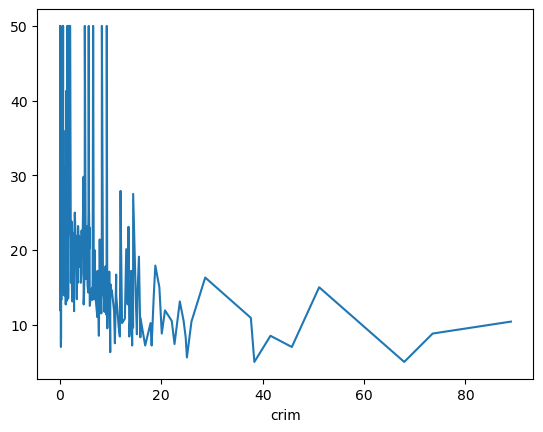

In [46]:
dfb.groupby('crim').medv.mean().plot() # al crescere del tasso di criminalalità 
                                       # il prezzo medio si abbassa

In [47]:
dfb.groupby('ptratio').rm.mean()   # più è basso il rapporto alunni/inseganti più è alto 
                                   # il numero di stanze 
 # il rappoto alunni/insegnati basso vuol dire che ci sono più insegnati che alunni e quindi credo che
 # la densità della popoloazione è bassa e le case sono più grandi con più stanze, ci sono più spazi.

ptratio
12.6    7.222667
13.0    7.406167
13.6    7.923000
14.4    7.875000
14.7    6.246235
14.8    6.752333
14.9    7.311250
15.1    6.816000
15.2    6.421923
15.3    6.705333
15.5    7.241000
15.6    6.702000
15.9    6.997000
16.0    6.230600
16.1    6.428800
16.4    6.139667
16.6    6.344188
16.8    6.146750
16.9    6.016400
17.0    6.868250
17.3    6.383000
17.4    7.212333
17.6    6.822429
17.8    6.496130
17.9    6.134818
18.0    7.218600
18.2    6.283000
18.3    6.520500
18.4    6.285938
18.5    6.288750
18.6    6.111588
18.7    6.406556
18.8    5.956000
18.9    5.785667
19.0    6.453750
19.1    6.234882
19.2    6.053632
19.6    6.224000
19.7    6.303250
20.1    5.585400
20.2    6.024021
20.9    6.266273
21.0    6.039778
21.1    5.888000
21.2    6.028533
22.0    5.799500
Name: rm, dtype: float64

In [48]:
dfb.groupby('ptratio').medv.mean()   # più è alto il rapporto alunni/inseganti più è basso il costo medio
# anche perchè le case sono più piccole

ptratio
12.6    32.733333
13.0    38.025000
13.6    50.000000
14.4    50.000000
14.7    25.717647
14.8    25.433333
14.9    40.475000
15.1    31.600000
15.2    26.276923
15.3    26.066667
15.5    32.700000
15.6    30.100000
15.9    30.250000
16.0    24.320000
16.1    24.880000
16.4    23.216667
16.6    23.856250
16.8    22.150000
16.9    19.640000
17.0    30.600000
17.3    24.700000
17.4    33.544444
17.6    30.700000
17.8    26.956522
17.9    22.363636
18.0    33.100000
18.2    22.150000
18.3    27.100000
18.4    23.131250
18.5    23.800000
18.6    24.335294
18.7    25.122222
18.8    17.350000
18.9    20.100000
19.0    24.900000
19.1    22.894118
19.2    22.805263
19.6    22.575000
19.7    21.787500
20.1    12.800000
20.2    16.611429
20.9    21.118182
21.0    17.351852
21.1    18.900000
21.2    17.093333
22.0    19.400000
Name: medv, dtype: float64

In [49]:
dfb.groupby('rad').age.mean()  # si la lontananza dalla autostrada è corredlata 
                               # ad un anzianità delle case

rad
1     45.025000
2     64.770833
3     49.310526
4     60.841818
5     69.223478
6     60.142308
7     40.141176
8     67.350000
24    89.805303
Name: age, dtype: float64

In [50]:
dfb.groupby('rad').rm.mean() # non ci sono grandi differenze

rad
1     6.555850
2     6.649958
3     6.473026
4     6.133118
5     6.393157
6     6.104731
7     6.647765
8     6.950792
24    6.022152
Name: rm, dtype: float64

In [51]:
dfb.groupby('rad').tax.mean() # più siamo lontani dalle autostr. più le tasse aumentano

rad
1     291.450000
2     260.666667
3     246.078947
4     335.981818
5     331.843478
6     372.884615
7     304.411765
8     301.250000
24    666.000000
Name: tax, dtype: float64

# Esercizio 1/3 
Abbiamo un DataFrame di dipendenti: 

    employees_df = pd.DataFrame({ 
        
        'employee_id': [101, 102, 103, 104, 105],
        
        'name': ['Alice', 'Bob', 'Charlie', 'David','Emma'], 
        
        'department_id': [1, 2, 1, 2, 3] })

# Esercizio 2/3 

E un DataFrame di dipartimenti: 

departments_df = pd.DataFrame({ 
    
    'department_id': [1, 2, 3],
    
    'department_name': ['HR', 'IT', 'Finance'],
    
    'location': ['New York', 'San Francisco', 'Chicago'] })

In [52]:
employees_df = pd.DataFrame({ 
        'employee_id': [101, 102, 103, 104, 105],
        'name': ['Alice', 'Bob', 'Charlie', 'David','Emma'], 
        'department_id': [1, 2, 1, 2, 3] })
employees_df

,employee_id,name,department_id
0,101,Alice,1
1,102,Bob,2
2,103,Charlie,1
3,104,David,2
4,105,Emma,3


In [53]:
departments_df = pd.DataFrame({
'department_id': [1, 2, 3],
'department_name': ['HR', 'IT', 'Finance'],
'location': ['New York', 'San Francisco', 'Chicago'] })
departments_df


,department_id,department_name,location
0,1,HR,New York
1,2,IT,San Francisco
2,3,Finance,Chicago


# Esercizio 3/3
* Unire questi DataFrame in base alla colonna comune department_id, in modo da avere nel risultato informazioni sia sui dipendenti che sui dipartimenti, usando la funzione .merge()
* Per ogni DataFrame, trasformare la colonna department_id nell'indice, facendo in modo che la modifica sia permanente; poi unire i due dataset mediante il metodo .join()
* Ci sono differenze nel risultato? Quali? Perché?

In [54]:
df_usa=employees_df.merge(departments_df, on="department_id")
df_usa

,employee_id,name,department_id,department_name,location
0,101,Alice,1,HR,New York
1,103,Charlie,1,HR,New York
2,102,Bob,2,IT,San Francisco
3,104,David,2,IT,San Francisco
4,105,Emma,3,Finance,Chicago


In [55]:
employees_df=employees_df.set_index("department_id")
departments_df=departments_df.set_index("department_id")
employees_df.join(departments_df)

,employee_id,name,department_name,location
department_id,,,,
1,101,Alice,HR,New York
1,103,Charlie,HR,New York
2,102,Bob,IT,San Francisco
2,104,David,IT,San Francisco
3,105,Emma,Finance,Chicago


La differenza tra il merge e la join è strutturale, nel merge ottengo una tabella con 6 colonne dove una è l'indice impostato di default, una department_id, le restanti quattro sono quelle delle info che trovo in comune anche nella join. Nella join ho 5 colonne, le quattro in comune con il merge e in più una corrisponde al department_id che è indice.

# Esercizio 
* Dal database AdventureWorksDW importiamo le tabelle dimemployee e dimemployeesalesterritory come DataFrame
* Effettuiamo un join tra i due DataFrame usando le colonne EmployeeKey
* Controlliamo la dimensione del DataFrame risultante: è quella attesa?
* Importiamo ora la tabella dimsalesterritory ed effettuiamo un join tra questa e il DataFrame risultante della join precedente, usando le colonne SalesTerritoryKey
* Su questo DataFrame contare quanti dipendenti ci sono per ogni paese (country) e per ogni regione (region)
* Valutiamo la media del BaseRate per ogni paese: ci sono differenze?

In [56]:
from sqlalchemy import create_engine
import dotenv
import os
import pandas as pd
dotenv.load_dotenv(override=True)
username = os.getenv('username')
password = os.getenv('password')
host = os.getenv('host')
dbname = os.getenv('dbname')
dbname = "AdventureWorksDW"
conn_string = f"mysql+pymysql://{username}:{password}@{host}/{dbname}"
db_engine = create_engine(conn_string)

In [57]:
query="""SELECT * FROM dimemployee"""
dimemployee=pd.read_sql(query,db_engine)
dimemployee.head()

,EmployeeKey,ParentEmployeeKey,EmployeeNationalIDAlternateKey,ParentEmployeeNationalIDAlternateKey,FirstName,LastName,MiddleName,NameStyle,Title,HireDate,...,Gender,PayFrequency,BaseRate,VacationHours,SickLeaveHours,CurrentFlag,SalesPersonFlag,DepartmentName,EmployeePhoto,Position
0,1,18.0,14417807,446466105.0,Guy,Gilbert,R,0,Production Technician - WC60,2006-01-28,...,M,1,12.4500,21,30,1,0,Production,b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x01...,None
1,2,7.0,253022876,24756624.0,Kevin,Brown,F,0,Marketing Assistant,2006-08-26,...,M,2,13.4615,42,41,1,0,Marketing,b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x01...,None
2,3,14.0,509647174,245797967.0,Roberto,Tamburello,None,0,Engineering Manager,2007-06-11,...,M,2,43.2692,2,21,1,0,Engineering,b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x01...,None
3,4,3.0,112457891,509647174.0,Rob,Walters,None,0,Senior Tool Designer,2007-07-05,...,M,2,29.8462,48,80,1,0,Tool Design,b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x01...,None
4,5,3.0,112457891,509647174.0,Rob,Walters,None,0,Senior Tool Designer,2007-07-05,...,M,2,29.8462,48,80,1,0,Tool Design,b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x01...,None


In [58]:
query="""SELECT * FROM dimemployeesalesterritory"""
dimemployeesalesterritory=pd.read_sql(query,db_engine)
dimemployeesalesterritory.head()

,EmployeeKey,SalesTerritoryKey
0,272,1
1,277,1
2,286,1
3,289,1
4,293,1


In [59]:
employee_sales_join=dimemployee.merge(dimemployeesalesterritory,on="EmployeeKey")
employee_sales_join.head()

,EmployeeKey,ParentEmployeeKey,EmployeeNationalIDAlternateKey,ParentEmployeeNationalIDAlternateKey,FirstName,LastName,MiddleName,NameStyle,Title,HireDate,...,PayFrequency,BaseRate,VacationHours,SickLeaveHours,CurrentFlag,SalesPersonFlag,DepartmentName,EmployeePhoto,Position,SalesTerritoryKey
0,272,277.0,502097814,112432117.0,Stephen,Jiang,Y,0,North American Sales Manager,2010-08-04,...,2,48.101,14,27,1,1,Sales,b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x01...,Sales Manager,1
1,272,277.0,502097814,112432117.0,Stephen,Jiang,Y,0,North American Sales Manager,2010-08-04,...,2,48.101,14,27,1,1,Sales,b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x01...,Sales Manager,2
2,272,277.0,502097814,112432117.0,Stephen,Jiang,Y,0,North American Sales Manager,2010-08-04,...,2,48.101,14,27,1,1,Sales,b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x01...,Sales Manager,3
3,272,277.0,502097814,112432117.0,Stephen,Jiang,Y,0,North American Sales Manager,2010-08-04,...,2,48.101,14,27,1,1,Sales,b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x01...,Sales Manager,4
4,272,277.0,502097814,112432117.0,Stephen,Jiang,Y,0,North American Sales Manager,2010-08-04,...,2,48.101,14,27,1,1,Sales,b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x01...,Sales Manager,5


In [60]:
query="""SELECT * FROM dimsalesterritory"""
salesterritory=pd.read_sql(query,db_engine)
salesterritory.head()

,SalesTerritoryKey,SalesTerritoryAlternateKey,SalesTerritoryRegion,SalesTerritoryCountry,SalesTerritoryGroup,SalesTerritoryImage
0,1,1,Northwest,United States,North America,b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x01...
1,2,2,Northeast,United States,North America,b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x01...
2,3,3,Central,United States,North America,b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x01...
3,4,4,Southwest,United States,North America,b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x01...
4,5,5,Southeast,United States,North America,b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x01...


In [61]:
employee_territory_join=employee_sales_join.merge(salesterritory, on="SalesTerritoryKey")
employee_territory_join.head()

,EmployeeKey,ParentEmployeeKey,EmployeeNationalIDAlternateKey,ParentEmployeeNationalIDAlternateKey,FirstName,LastName,MiddleName,NameStyle,Title,HireDate,...,SalesPersonFlag,DepartmentName,EmployeePhoto,Position,SalesTerritoryKey,SalesTerritoryAlternateKey,SalesTerritoryRegion,SalesTerritoryCountry,SalesTerritoryGroup,SalesTerritoryImage
0,272,277.0,502097814,112432117.0,Stephen,Jiang,Y,0,North American Sales Manager,2010-08-04,...,1,Sales,b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x01...,Sales Manager,1,1,Northwest,United States,North America,b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x01...
1,277,277.0,112432117,112432117.0,Brian,Welcker,S,0,Director of Sales,2010-09-15,...,1,Sales,b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x01...,Sales Director,1,1,Northwest,United States,North America,b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x01...
2,286,272.0,61161660,502097814.0,Pamela,Ansman-Wolfe,O,0,Sales Representative,2010-12-29,...,1,Sales,b'\x89PNG\r\n\x1a\n\x00\x00\x00\rIHDR\x00\x00\...,Sales Representative,1,1,Northwest,United States,North America,b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x01...
3,289,272.0,987554265,502097814.0,David,Campbell,R,0,Sales Representative,2010-12-29,...,1,Sales,b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x01...,Sales Representative,1,1,Northwest,United States,North America,b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x01...
4,293,272.0,90836195,502097814.0,Tete,Mensa-Annan,A,0,Sales Representative,2012-04-30,...,1,Sales,b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x01...,Sales Representative,1,1,Northwest,United States,North America,b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x01...


In [62]:
dimemployee.shape

(296, 28)

In [63]:
dimemployeesalesterritory.shape

(39, 2)

In [64]:
employee_sales_join.shape  # la join risultante tra 28 e 2 colonne è 29 colonne=28-1+2-1+1

(39, 29)

In [65]:
salesterritory.shape

(11, 6)

In [66]:
employee_territory_join.shape #la join risultante tra 29 e 6 colonne tolta la chiave è di 34 colonne

(39, 34)

In [67]:
employee_territory_join.groupby(['SalesTerritoryCountry','SalesTerritoryRegion'])['EmployeeKey'].count()

SalesTerritoryCountry  SalesTerritoryRegion
Australia              Australia               3
Canada                 Canada                  4
France                 France                  4
Germany                Germany                 3
United Kingdom         United Kingdom          3
United States          Central                 5
                       Northeast               3
                       Northwest               5
                       Southeast               4
                       Southwest               5
Name: EmployeeKey, dtype: int64

In [68]:
employee_territory_join.groupby('SalesTerritoryCountry').BaseRate.mean()# poche differenza

SalesTerritoryCountry
Australia         47.764433
Canada            41.592550
France            41.592550
Germany           47.764433
United Kingdom    47.764433
United States     39.909309
Name: BaseRate, dtype: float64